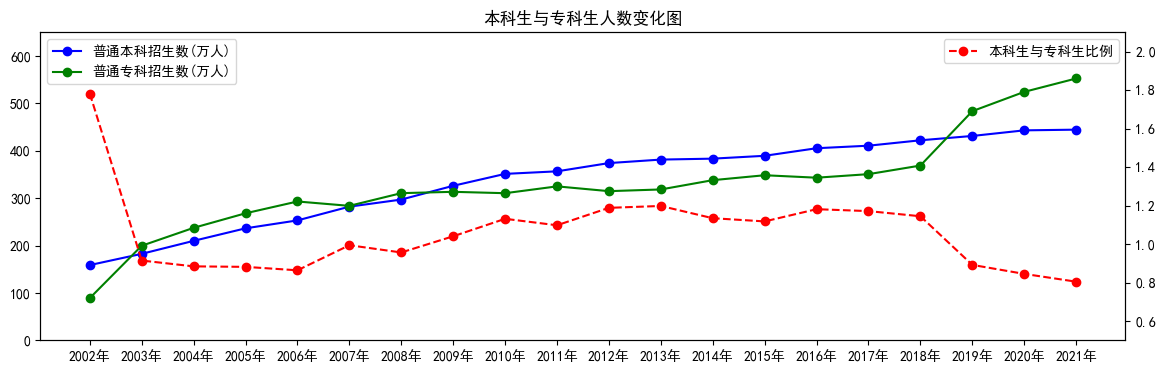

本科生拟合公式: y = 1147592.89 * exp(-(-0.00) * x) + -1147395.06
专科生拟合公式: y = 75.84 * exp(-(-0.08) * x) + 137.47


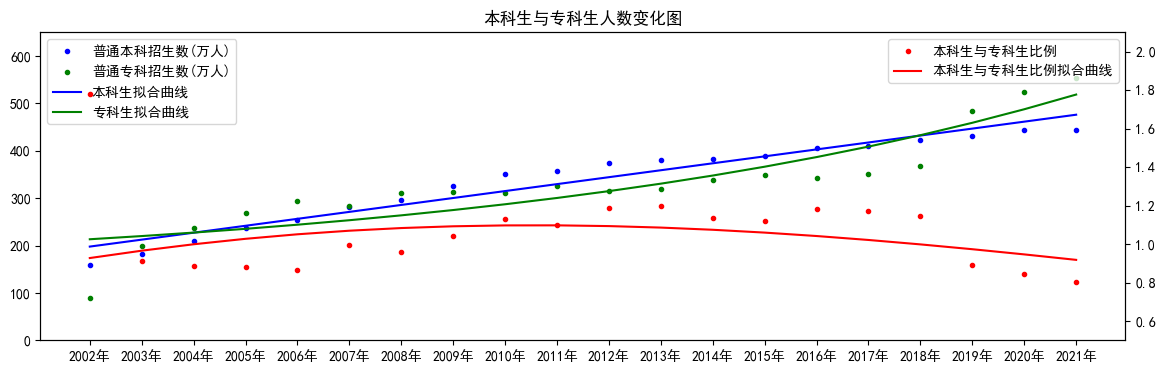

未来五年本科生预测值:  [490.78, 505.43, 520.08, 534.73, 549.38]
未来五年专科生预测值:  [552.5, 589.32, 629.4, 673.04, 720.55]
未来五年本科生与专科生比例预测值:  [0.89, 0.86, 0.83, 0.79, 0.76]


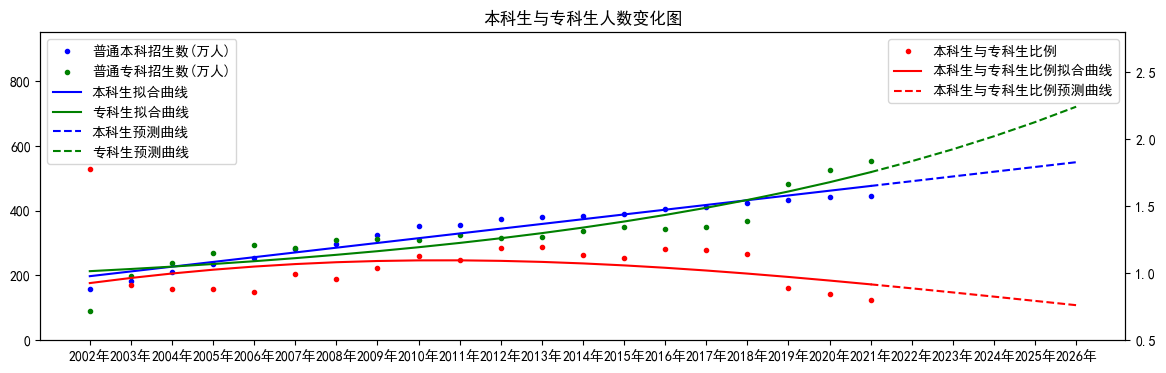

In [93]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# 第一部分 读取和可视化
dir = Path('.').parent                      # 获取当前位置
df = pd.read_excel(dir / 'data.xlsx')       # 读取 Data.xlsx 文件
x = df.columns.values.tolist()[:0:-1]       # 读取表头作为 x 轴
y1 = df.iloc[0].values.tolist()[:0:-1]      # 读取第一行作为本科生数据
y2 = df.iloc[1].values.tolist()[:0:-1]      # 读取第二行作为专科生数据
plt.figure(figsize=(14, 4), dpi=100)        # 设置画布大小和分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']    # 解决中文显示问题
plt.plot(x, y1, 'bo-', label='普通本科招生数(万人)')    # 画本科生折线图
plt.plot(x, y2, 'go-', label='普通专科招生数(万人)')    # 画专科生折线图
plt.ylim(0, 650)                            # 设置 y 轴范围
plt.legend()                                # 显示图例
plt.title('本科生与专科生人数变化图')           # 设置图表标题
plt.twinx()                                 # 另立标尺
plt.plot(x, [i / j for i, j in zip(y1, y2)],
         'ro--', label='本科生与专科生比例')    # 画比例折线图
plt.ylim(0.5, 2.1)                            # 设置 y 轴范围
plt.legend()                                # 显示图例
plt.show()                                  # 显示图表


# 第二部分 拟合
xnum = np.arange(20)                        # 生成 0-19 的数组


def func(x, a, b, c):                       # 定义拟合函数
    return a * np.exp(-b * x) + c           # 拟合函数公式


np.seterr(over='ignore')                    # 忽略溢出警告
# 拟合本科生数据
popt1, pcov1 = curve_fit(func, xnum, y1, maxfev=10000)
print('本科生拟合公式: y = {:.2f} * exp(-({:.2f}) * x) + {:.2f}'.format(*popt1))
# 拟合专科生数据
popt2, pcov2 = curve_fit(func, xnum, y2, maxfev=10000)
print('专科生拟合公式: y = {:.2f} * exp(-({:.2f}) * x) + {:.2f}'.format(*popt2))


# 第三部分 绘制拟合曲线
plt.figure(figsize=(14, 4), dpi=100)        # 设置画布大小和分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']    # 解决中文显示问题
plt.plot(x, y1, 'b.', label='普通本科招生数(万人)')   # 画本科生点图
plt.plot(x, y2, 'g.', label='普通专科招生数(万人)')  # 画专科生点图
plt.plot(x, func(xnum, *popt1), 'b-', label='本科生拟合曲线')    # 画本科生拟合曲线
plt.plot(x, func(xnum, *popt2), 'g-', label='专科生拟合曲线')    # 画专科生拟合曲线
plt.ylim(0, 650)                            # 设置 y 轴范围
plt.legend()                                # 显示图例
plt.title('本科生与专科生人数变化图')           # 设置图表标题
plt.twinx()                                 # 另立标尺
plt.plot(x, [i / j for i, j in zip(y1, y2)], 'r.', label='本科生与专科生比例')   # 画比例点图
plt.plot(x, func(xnum, *popt1) / func(xnum, *popt2),
         'r-', label='本科生与专科生比例拟合曲线')    # 画比例拟合曲线
plt.ylim(0.5, 2.1)                            # 设置 y 轴范围
plt.legend()                                # 显示图例
plt.show()                                  # 显示图表


# 第四部分 预测未来五年并绘图
plt.figure(figsize=(14, 4), dpi=100)        # 设置画布大小和分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']    # 解决中文显示问题
fx = ['2021年', '2022年', '2023年', '2024年', '2025年', '2026年']   # 生成预测年份
fxnum = np.arange(19, 25)                # 生成预测年份
fy1 = func(fxnum, *popt1)                # 本科生预测值
fy2 = func(fxnum, *popt2)                # 专科生预测值
print('未来五年本科生预测值: ', [round(i, 2) for i in fy1[1:]])     # 输出预测值
print('未来五年专科生预测值: ', [round(i, 2) for i in fy2[1:]])     # 输出预测值
print('未来五年本科生与专科生比例预测值: ', [round(i / j, 2)
      for i, j in zip(fy1[1:], fy2[1:])])    # 输出预测比例
plt.plot(x, y1, 'b.', label='普通本科招生数(万人)')   # 画本科生点图
plt.plot(x, y2, 'g.', label='普通专科招生数(万人)')  # 画专科生点图
plt.plot(x, func(xnum, *popt1), 'b-', label='本科生拟合曲线')    # 画本科生拟合曲线
plt.plot(x, func(xnum, *popt2), 'g-', label='专科生拟合曲线')    # 画专科生拟合曲线
plt.plot(fx, fy1, 'b--', label='本科生预测曲线')    # 画本科生预测曲线
plt.plot(fx, fy2, 'g--', label='专科生预测曲线')    # 画专科生预测曲线
plt.ylim(0, 950)                            # 设置 y 轴范围
plt.legend()                                # 显示图例
plt.title('本科生与专科生人数变化图')           # 设置图表标题
plt.twinx()                                 # 另立标尺
plt.plot(x, [i / j for i, j in zip(y1, y2)], 'r.', label='本科生与专科生比例')   # 画比例点图
plt.plot(x, func(xnum, *popt1) / func(xnum, *popt2),
         'r-', label='本科生与专科生比例拟合曲线')    # 画比例拟合曲线
plt.plot(fx, [i / j for i, j in zip(fy1, fy2)],
         'r--', label='本科生与专科生比例预测曲线')    # 画比例预测曲线
plt.ylim(0.5, 2.8)                            # 设置 y 轴范围
plt.legend()                                # 显示图例
plt.show()                                  # 显示图表
